In [1]:
import pandas as pd
import numpy as np

In [12]:
df=pd.read_csv('/content/placement.csv')

In [13]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [14]:
 df.shape

(100, 4)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [16]:
# STEPS
# 1. Preprocessing + EDA+ Feature SElection
# 2. Extract input and output
# 3. Train test spilt
# 4. Scaling the values
# 5. Train the model
# 6. Evaluate model and model selection
# 7. Deploy the model

In [19]:
df=df.iloc[:,1:]

In [20]:
df


,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [8]:
import matplotlib.pyplot as plt

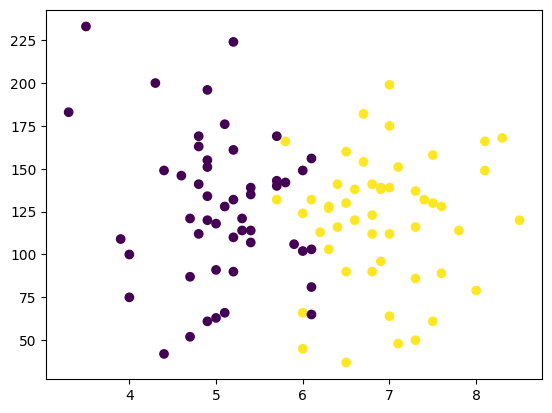

In [22]:
plt.scatter(df["cgpa"],df["iq"],c=df["placement"])

In [23]:
x= df.iloc[:,0:2]
y=df.iloc[:,-1]

In [26]:
x.shape


(100, 2)

In [27]:
y.shape


(100,)

In [29]:
 from sklearn.model_selection import train_test_split

In [43]:
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [44]:
x_train.shape

(90, 2)

In [45]:
y_train.shape


(90,)

In [46]:
x_test.shape


(10, 2)

In [47]:
y_test.shape

(10,)

In [48]:
y_train

,placement
42,1
28,0
35,1
90,1
82,1
...,...
99,1
92,0
1,0
30,1


In [49]:
x_test

,cgpa,iq
10,6.0,45.0
66,6.9,96.0
36,5.7,140.0
2,5.3,121.0
4,5.8,142.0
85,5.8,166.0
47,5.2,161.0
5,7.1,48.0
17,3.3,183.0
6,5.7,143.0


In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
scaler=StandardScaler()

In [52]:
x_train= scaler.fit_transform(x_train)

In [53]:
x_train

array([[ 1.37077485, -0.88180525],
       [-0.71876197, -0.8562292 ],
       [ 0.67426257, -0.8562292 ],
       [ 1.10958274, -0.95853339],
       [ 0.41307047, -2.21175967],
       [ 0.2389424 , -0.5237406 ],
       [-0.0222497 ,  0.65275754],
       [-0.63169794, -0.24240409],
       [-1.85059441, -0.37028432],
       [ 1.19664678,  0.21796475],
       [ 0.06481434, -1.49563037],
       [ 1.10958274, -0.19125199],
       [-0.2834418 ,  1.16427847],
       [ 0.84839064, -1.52120641],
       [ 0.41307047, -0.8562292 ],
       [ 1.28371081, -1.59793455],
       [ 0.41307047,  0.16681266],
       [ 0.2389424 ,  0.11566057],
       [-0.805826  ,  0.11566057],
       [ 0.06481434,  0.21796475],
       [ 0.67426257, -0.29355618],
       [ 2.15435115, -0.08894781],
       [-2.19885055,  2.80114545],
       [-1.41527424, -2.08387944],
       [-1.15408214, -0.93295734],
       [ 1.54490291, -0.24240409],
       [-0.71876197,  0.21796475],
       [ 0.67426257, -0.01221967],
       [ 0.67426257,

In [54]:
x_test=scaler.transform(x_test)

In [55]:
x_test

array([[-0.0222497 , -2.0071513 ],
       [ 0.76132661, -0.70277292],
       [-0.2834418 ,  0.42257312],
       [-0.63169794, -0.06337176],
       [-0.19637777,  0.47372522],
       [-0.19637777,  1.08755033],
       [-0.71876197,  0.9596701 ],
       [ 0.93545468, -1.93042316],
       [-2.37297861,  1.52234313],
       [-0.2834418 ,  0.49930126]])

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
clf= LogisticRegression()

In [59]:
#MODEL TRAINING
clf.fit(x_train, y_train)

LogisticRegression()

In [60]:
#Model Evaluation

In [63]:
y_pred=clf.predict(x_test)

In [64]:
from sklearn.metrics import accuracy_score

In [66]:
accuracy_score(y_test,y_pred)

0.8

In [68]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

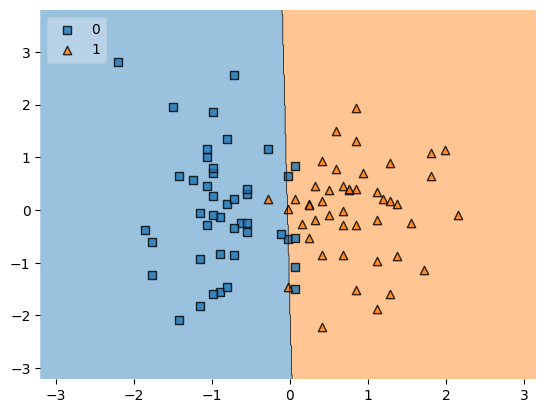

In [69]:
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

In [70]:
import pickle

In [71]:
pickle.dump(clf, open("model.pkl","wb"))